# PROBLEM STATEMENT:
Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute.

# Importing Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

In [67]:
df=pd.read_csv("browser_rankings_data.csv")
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


# Performing EDA

In [68]:
# lets find the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [69]:
df.shape

(3066, 10)

In [70]:
df.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [71]:
# lets check for the null values present
df.isna().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

# lets treat the missing values using KNN Imputer

In [72]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)# by default we use n_neighbours =5

In [73]:
Rank_1=[col for col in df.columns if df[col].dtypes !='O']

In [74]:
df1=knn.fit_transform(df[Rank_1])
#print("\n\n after performing theimputation\n",df1)
#df2=pd.DataFrame(df1)
#df2
#df2=pd.concat(df,pd.DataFrame(df1))
#knn.fit(df[Rank])
df1

array([[1.00000e+00, 2.00000e+00],
       [2.00000e+00, 3.00000e+00],
       [3.00000e+00, 4.00000e+00],
       ...,
       [1.31576e+05, 5.00000e+00],
       [1.31576e+05, 5.00000e+00],
       [1.31576e+05, 5.00000e+00]])

In [75]:
df2=pd.DataFrame(df1,columns=['index1','Rank1'])
print('\nPandas dataframe')
df2


Pandas dataframe


,index1,Rank1
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0
3,3.0,4.0
4,4.0,1.0
...,...,...
3061,131575.0,7.0
3062,131576.0,5.0
3063,131576.0,5.0
3064,131576.0,5.0


In [76]:
df_final=pd.concat([df,df2],axis=1)

In [77]:
df_final.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,index1,Rank1
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",1.0,2.0
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",2.0,3.0
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",3.0,4.0
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",3.0,4.0
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,4.0,1.0


In [78]:
df_final.drop(columns=["Rank","index1","Country","Language"],axis=1,inplace=True)
df_final.head()

,ID,Keyword,Date,App ID,Date of Last Description Change,Short Description,Long Description,Rank1
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",2.0
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",3.0
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",4.0
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",4.0
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,1.0


In [79]:
df_final.rename(columns={"App ID": "APPID","Date of Last Description Change":"Last_des_change","Short Description":"Short_des","Long Description" :"Long_des"},inplace=True)
df_final.head()

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",2.0
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",3.0
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",4.0
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",4.0
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,1.0


In [80]:
df_final.Rank1.isnull().sum()

0

# lets check for the unqiue values if present

In [81]:

df_final.Keyword.unique()

array(['browser', 'android browser', 'privacy browser',
       'privacy browsers for android', 'best privacy browsers',
       'fast browser', 'ad free browser'], dtype=object)

So there are 7 unique keywords present

In [82]:
df_final.Date.unique()

array(['16-12-2020', '17-12-2020', '18-12-2020', '19-12-2020',
       '21-12-2020', '22-12-2020', '23-12-2020', '24-12-2020',
       '25-12-2020', '26-12-2020', '27-12-2020', '28-12-2020',
       '29-12-2020', '30-12-2020', '31-12-2020', '01-01-2021',
       '02-01-2021', '03-01-2021', '04-01-2021', '05-01-2021',
       '06-01-2021', '07-01-2021', '08-01-2021', '09-01-2021',
       '10-01-2021', '11-01-2021', '12-01-2021', '13-01-2021',
       '14-01-2021', '15-01-2021', '16-01-2021', '17-01-2021',
       '18-01-2021', '19-01-2021', '20-01-2021', '21-01-2021',
       '22-01-2021', '26-01-2021', '27-01-2021', '28-01-2021',
       '29-01-2021', '30-01-2021', '31-01-2021', '01-02-2021',
       '03-02-2021', '04-02-2021', '05-02-2021', '06-02-2021',
       '07-02-2021', '08-02-2021', '09-02-2021', '10-02-2021',
       '11-02-2021', '12-02-2021', '13-02-2021', '14-02-2021',
       '15-02-2021', '16-02-2021', '17-02-2021', '18-02-2021',
       '19-02-2021', '20-02-2021', '21-02-2021', '22-02

In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3066 non-null   int64  
 1   Keyword          3066 non-null   object 
 2   Date             3066 non-null   object 
 3   APPID            3066 non-null   object 
 4   Last_des_change  3066 non-null   object 
 5   Short_des        3066 non-null   object 
 6   Long_des         3066 non-null   object 
 7   Rank1            3066 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 191.8+ KB


In [84]:
df_final.duplicated().shape

(3066,)

In [85]:
# lets remove if any uplicates are present
df_final.drop_duplicates(keep='first').reset_index(drop=True)
df_final

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",2.0
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",3.0
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",4.0
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",4.0
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,1.0
...,...,...,...,...,...,...,...,...
3061,131575,android browser,06-03-2021,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",7.0
3062,131576,android browser,06-03-2021,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,5.0
3063,131576,android browser,06-03-2021,com.cloudmosa.puffinTV,06-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,5.0
3064,131576,android browser,06-03-2021,com.cloudmosa.puffinTV,21-01-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,5.0


In [86]:
df_final.APPID.value_counts()

com.duckduckgo.mobile.android    740
com.cloudmosa.puffinTV           608
com.vivaldi.browser              370
com.transsion.phoenix            370
com.brave.browser                370
com.opera.browser                304
net.fast.web.browser             152
com.android.chrome               152
Name: APPID, dtype: int64

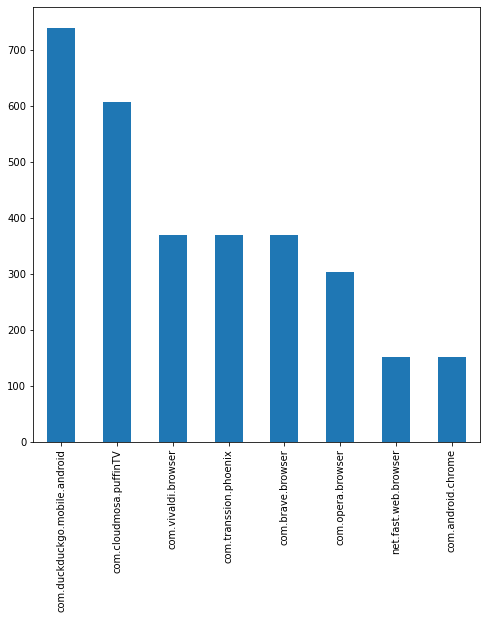

In [87]:
# lets visualize the APP Id
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df_final['APPID'].value_counts().plot(kind="bar")
plt.show()

form the graph it shows that the duckduckgo.mobile.androiod has the highest ranking when compared to the rest

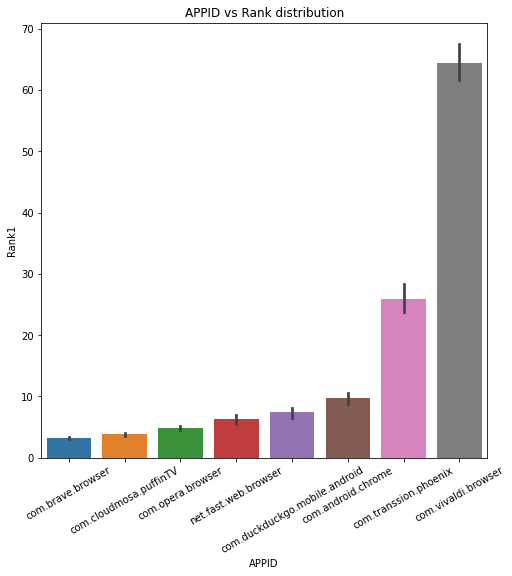

In [88]:
#Rank1 vs App ID
plt.figure(figsize=(8,8))

sns.barplot(x='APPID',y='Rank1',data=df_final,order=df_final[['APPID','Rank1']].groupby('APPID').mean().sort_values('Rank1').reset_index().APPID)
plt.xticks(rotation=30)
plt.title('APPID vs Rank distribution')
plt.show()


# Data Cleaning:TEXT data

# TEXT CLEANING FOR SHORT DESCRIPTION

In [90]:
import re
import string
def clean_text(Short_des):
    'make thetext lower case,remove the squarebrackets,remove the text in punctuations and special characters'
   # review=review.lower()
    Short_des=re.sub('\[.*?\]','',str(Short_des))
    Short_des=re.sub('[%s]'%re.escape(string.punctuation),'',str(Short_des))
    Short_des=re.sub('\w*\d\w*','',str(Short_des))
    Short_des = re.sub("[0-9" "]+"," ",str(Short_des))
    Short_des = re.sub('[‘’“”…]', '', str(Short_des))
    Short_des=re.sub('https:\ $',' ',str(Short_des))
    Short_des=re.sub(" _'_ ",' ',str(Short_des))
    Short_des = re.sub('a{3}','',Short_des)
    Short_des=re.sub("[^A-Za-z" "]+"," ",Short_des).lower()
    return(Short_des)
clean=lambda x : clean_text(x)

In [91]:
df_final['Short_des'] =df_final.Short_des.apply(clean)
df_final

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,the small fastest secure web browser best mobi...,"One of the smallest, fastest, secure Web Brows...",2.0
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,fast simple and secure google chrome browser f...,"Google Chrome is a fast, easy to use, and secu...",3.0
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,fast safe web browser free vpn ad blocker qrco...,"Fast, safe and private, introducing the latest...",4.0
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,fast safe web browser free vpn ad blocker qrco...,"Opera is a fast, safe web browser for your And...",4.0
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,puffin tv browser one app to watch all videos ...,Puffin TV Browser is a special edition of Puff...,1.0
...,...,...,...,...,...,...,...,...
3061,131575,android browser,06-03-2021,com.opera.browser,18-12-2020,fast safe web browser free vpn ad blocker qrco...,"Opera is a fast, safe web browser for your And...",7.0
3062,131576,android browser,06-03-2021,com.cloudmosa.puffinTV,07-02-2021,puffin tv browser one app to watch all videos ...,Puffin TV Browser is a special edition of Puff...,5.0
3063,131576,android browser,06-03-2021,com.cloudmosa.puffinTV,06-02-2021,puffin tv browser one app to watch all videos ...,Puffin TV Browser is a special edition of Puff...,5.0
3064,131576,android browser,06-03-2021,com.cloudmosa.puffinTV,21-01-2021,puffin tv browser one app to watch all videos ...,Puffin TV Browser is a special edition of Puff...,5.0


# TEXT CLEANING FOR LONG DESCRIPTION

In [92]:
def clean_text(Long_des):
    'make thetext lower case,remove the squarebrackets,remove the text in punctuations and special characters'
   # review=review.lower()
    Long_des=re.sub('\[.*?\]','',str(Long_des))
    Long_des=re.sub('[%s]'%re.escape(string.punctuation),'',str(Long_des))
    Long_des=re.sub('\w*\d\w*','',str(Long_des))
    Long_des = re.sub("[0-9" "]+"," ",str(Long_des))
    Long_des = re.sub('[‘’“”…]', '', str(Long_des))
    Long_des=re.sub('https:\ $',' ',str(Long_des))
    Long_des=re.sub(" _'_ ",' ',str(Long_des))
    Long_des = re.sub('a{3}','',Long_des)
    Long_des=re.sub("[^A-Za-z" "]+"," ",Long_des).lower()
    return(Long_des)
clean=lambda x : clean_text(x)

In [93]:
df_final["Long_des"]=df_final.Long_des.apply(clean_text)
df_final.head()

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,the small fastest secure web browser best mobi...,one of the smallest fastest secure web browser...,2.0
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,fast simple and secure google chrome browser f...,google chrome is a fast easy to use and secure...,3.0
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,fast safe web browser free vpn ad blocker qrco...,fast safe and private introducing the latest v...,4.0
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,fast safe web browser free vpn ad blocker qrco...,opera is a fast safe web browser for your andr...,4.0
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,puffin tv browser one app to watch all videos ...,puffin tv browser is a special edition of puff...,1.0


# Remove the stop words FOR SHORT DESCRIPTION

In [94]:

# lets remove the stopwords and checking its count
from nltk.corpus import stopwords
stop=stopwords.words('english')
df_final['Short_des']=df_final['Short_des'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_final['stopwords']= df_final['Short_des'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_final[['Short_des','stopwords']].head()

,Short_des,stopwords
0,small fastest secure web browser best mobile b...,0
1,fast simple secure google chrome browser andro...,0
2,fast safe web browser free vpn ad blocker qrco...,0
3,fast safe web browser free vpn ad blocker qrco...,0
4,puffin tv browser one app watch videos web,0


# Remove the stop words FOR lONG DESCRIPTION

In [95]:

# lets remove the stopwords and checking its count
from nltk.corpus import stopwords
stop=stopwords.words('english')
df_final['Long_des']=df_final['Long_des'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_final['stopwords']= df_final['Long_des'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_final[['Long_des','stopwords']].head()

,Long_des,stopwords
0,one smallest fastest secure web browser specif...,0
1,google chrome fast easy use secure web browser...,0
2,fast safe private introducing latest version o...,0
3,opera fast safe web browser android device fea...,0
4,puffin tv browser special edition puffin web b...,0


# Checking for unique words for Short and Long Description

In [96]:
 # lets check for the unqiue words for SHORT_DESCRIPTION
df_final_uniq=list(set(" ".join(df_final['Short_des']).split(" ")))
df_final_uniq_WORDS=pd.DataFrame(df_final_uniq)
df_final_uniq_WORDS.head(10)

,0
0,private
1,simple
2,best
3,fast
4,vpn
5,dark
6,tv
7,small
8,popup
9,internet


In [97]:
# lets check for the unqiue words for LONG_DESCRIPTION
df_final_uniq=list(set(" ".join(df_final['Long_des']).split(" ")))
df_final_uniq_WORDS=pd.DataFrame(df_final_uniq)
df_final_uniq_WORDS.head(10)

,0
0,ever
1,decode
2,clean
3,capture
4,care
5,playing
6,legal
7,may
8,easier
9,tv


# Sentiment Anaylsis by TEXTBLOB

In [98]:
import textblob
from textblob import TextBlob

 lets check for the polarity for Short Description

In [99]:

def senti_anly(df_final):
    sentiment=TextBlob(df_final['Short_des']).sentiment
    return pd.Series([sentiment.polarity])
df_final[['polarity_short_des']]=df_final.apply(senti_anly,axis=1)
df_final.head()

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,stopwords,polarity_short_des
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,2.0,0,0.337500
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,3.0,0,0.200000
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,4.0,0,0.366667
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,4.0,0,0.366667
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,1.0,0,0.000000


lets check polarity for Long_description

In [100]:

df_final["polarity_long_des"]=df_final["Long_des"].apply(lambda x :TextBlob(x).sentiment.polarity)
df_final.head()

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,stopwords,polarity_short_des,polarity_long_des
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,2.0,0,0.337500,0.323434
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,3.0,0,0.200000,0.184701
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,4.0,0,0.366667,0.195667
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,4.0,0,0.366667,0.195164
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,1.0,0,0.000000,0.152101


# lets check for the lenght of the text data:: SHORT AND LONG DESCRIPTION

In [101]:
#
df_final['len_short_des']=df_final['Short_des'].apply(lambda x : len(x))
df_final.head(5)

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,stopwords,polarity_short_des,polarity_long_des,len_short_des
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,2.0,0,0.337500,0.323434,71
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,3.0,0,0.200000,0.184701,63
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,4.0,0,0.366667,0.195667,77
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,4.0,0,0.366667,0.195164,77
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,1.0,0,0.000000,0.152101,42


In [102]:
df# lets check for the lenght of the text data
df_final['len_Long_des']=df_final['Long_des'].apply(lambda x : len(x))
df_final.head(5)

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,stopwords,polarity_short_des,polarity_long_des,len_short_des,len_Long_des
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,2.0,0,0.337500,0.323434,71,972
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,3.0,0,0.200000,0.184701,63,1879
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,4.0,0,0.366667,0.195667,77,2272
3,3,browser,16-12-2020,com.opera.browser,18-12-2020,fast safe web browser free vpn ad blocker qrco...,opera fast safe web browser android device fea...,4.0,0,0.366667,0.195164,77,2802
4,4,browser,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web b...,1.0,0,0.000000,0.152101,42,1038


In [103]:
dfx=df_final
dfx.head(3)

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,stopwords,polarity_short_des,polarity_long_des,len_short_des,len_Long_des
0,1,browser,16-12-2020,net.fast.web.browser,18-12-2020,small fastest secure web browser best mobile b...,one smallest fastest secure web browser specif...,2.0,0,0.337500,0.323434,71,972
1,2,browser,16-12-2020,com.android.chrome,18-12-2020,fast simple secure google chrome browser andro...,google chrome fast easy use secure web browser...,3.0,0,0.200000,0.184701,63,1879
2,3,browser,16-12-2020,com.opera.browser,27-02-2021,fast safe web browser free vpn ad blocker qrco...,fast safe private introducing latest version o...,4.0,0,0.366667,0.195667,77,2272


# lets find the correlation between the features
#Lets convert whole data set after cleaning into Labels

In [104]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
df_final["Keyword"]=lm.fit_transform(df_final["Keyword"])
df_final["APPID"]=lm.fit_transform(df_final["APPID"])
df_final["Short_des"]=lm.fit_transform(df_final["Short_des"])
df_final["Long_des"]=lm.fit_transform(df_final["Long_des"])
df_final["Date"]=lm.fit_transform(df_final["Date"])
df_final["Last_des_change"]=lm.fit_transform(df_final["Last_des_change"])
df_final

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,stopwords,polarity_short_des,polarity_long_des,len_short_des,len_Long_des
0,1,3,37,7,3,7,2,2.0,0,0.337500,0.323434,71,972
1,2,3,37,0,3,3,1,3.0,0,0.200000,0.184701,63,1879
2,3,3,37,4,5,2,0,4.0,0,0.366667,0.195667,77,2272
3,3,3,37,4,3,2,3,4.0,0,0.366667,0.195164,77,2802
4,4,3,37,2,1,6,7,1.0,0,0.000000,0.152101,42,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,131575,1,16,4,3,2,3,7.0,0,0.366667,0.195164,77,2802
3062,131576,1,16,2,1,6,7,5.0,0,0.000000,0.152101,42,1038
3063,131576,1,16,2,0,6,6,5.0,0,0.000000,0.159130,42,1222
3064,131576,1,16,2,4,6,8,5.0,0,0.000000,0.142313,42,1174


In [105]:
df_final.drop('stopwords',axis=1,inplace=True)
df_final.head(4)

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,polarity_short_des,polarity_long_des,len_short_des,len_Long_des
0,1,3,37,7,3,7,2,2.0,0.337500,0.323434,71,972
1,2,3,37,0,3,3,1,3.0,0.200000,0.184701,63,1879
2,3,3,37,4,5,2,0,4.0,0.366667,0.195667,77,2272
3,3,3,37,4,3,2,3,4.0,0.366667,0.195164,77,2802


# Finding DATA correlation

In [106]:
df_final.corr()

,ID,Keyword,Date,APPID,Last_des_change,Short_des,Long_des,Rank1,polarity_short_des,polarity_long_des,len_short_des,len_Long_des
ID,1.000000,0.001623,-0.152197,0.000907,0.000118,-0.002644,0.002429,0.007532,-0.000819,-0.001600,0.001571,0.001237
Keyword,0.001623,1.000000,-0.000214,0.067906,0.008908,-0.197668,0.181591,0.102865,-0.061148,-0.119549,0.117559,0.092638
Date,-0.152197,-0.000214,1.000000,-0.000113,-0.000015,0.000330,-0.000303,0.002723,0.000102,0.000200,-0.000196,-0.000155
APPID,0.000907,0.067906,-0.000113,1.000000,0.199522,-0.090552,0.124045,0.522874,0.072865,0.032789,0.308775,0.226964
Last_des_change,0.000118,0.008908,-0.000015,0.199522,1.000000,-0.130516,-0.273804,0.090592,0.446580,0.184879,0.514854,0.360254
Short_des,-0.002644,-0.197668,0.000330,-0.090552,-0.130516,1.000000,-0.529165,-0.213614,0.297562,0.686746,-0.242951,0.029157
Long_des,0.002429,0.181591,-0.000303,0.124045,-0.273804,-0.529165,1.000000,0.335016,-0.852096,-0.675352,-0.427328,-0.381420
Rank1,0.007532,0.102865,0.002723,0.522874,0.090592,-0.213614,0.335016,1.000000,-0.179013,0.006403,0.158135,0.350866
polarity_short_des,-0.000819,-0.061148,0.000102,0.072865,0.446580,0.297562,-0.852096,-0.179013,1.000000,0.738521,0.794529,0.625393
polarity_long_des,-0.001600,-0.119549,0.000200,0.032789,0.184879,0.686746,-0.675352,0.006403,0.738521,1.000000,0.441524,0.548019


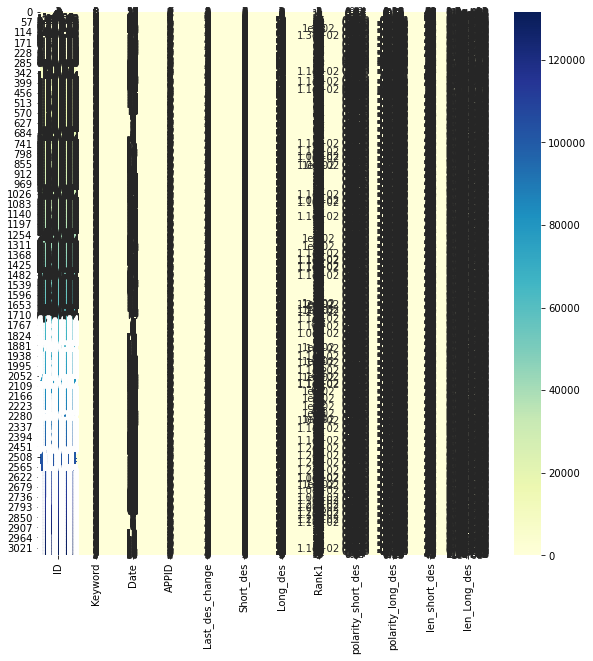

In [107]:
plt.figure(figsize=(10,10))
df=sns.heatmap(df_final,cmap="YlGnBu",annot=True,fmt='0.2g')


For checking correlation between two features i am using statstical hypothesis test called  Chi square,
the hypothesis goes like this:

H0 : There is no relation between the variables
H1 : There is relation between the variables
we can verify hypothesis using P-value, that is if the P-value is greater than 0.05, H0 will be accepted otherwise rejected

In [108]:
#lest find the corealtion between the short and Long DEscription columns
from scipy.stats import chi2_contingency

In [109]:
SL_des = pd.crosstab( df_final['Short_des'],df_final['Long_des'])
stats = chi2_contingency(SL_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 21462.0 , dof is 84


P value is 0 which means there is a correalation between short and long description

In [110]:
#lets find the correalation between the Rank and Short description
RS_des = pd.crosstab( df_final['Rank1'],df_final['Short_des'])
stats = chi2_contingency(RS_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 6100.536940969434 , dof is 903


Since the value of p is 0  which means there is strong corelation between Rank and the Short description

In [111]:
#lets find the correalation between the Rank and Long description
RL_des = pd.crosstab( df_final['Rank1'],df_final['Long_des'])
stats = chi2_contingency(RL_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 6100.536940969434 , dof is 1548


Since the value of p is 0  which means there is strong corelation between Rank and the Long description

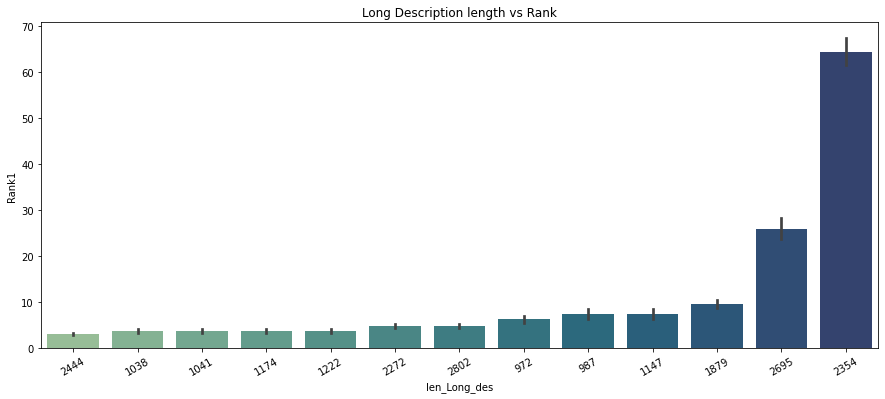

In [112]:
plt.figure(figsize=(15,6))

sns.barplot(x='len_Long_des',y='Rank1',data=df_final,palette='crest',order=df_final[['len_Long_des','Rank1']].groupby('len_Long_des').mean().sort_values('Rank1').reset_index().len_Long_des)
plt.xticks(rotation=30)
plt.title('Long Description length vs Rank')
plt.show()


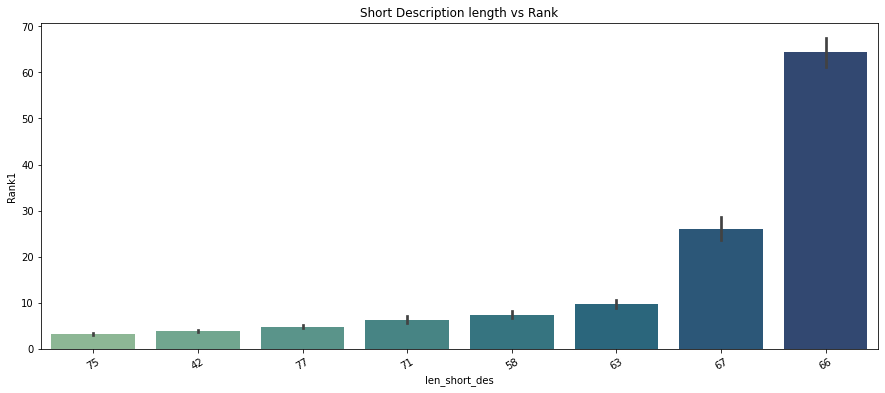

In [113]:
# lets visaulize the correaltion between the short_description and the Rank1
plt.figure(figsize=(15,6))

sns.barplot(x='len_short_des',y='Rank1',data=df_final,palette='crest',order=df_final[['len_short_des','Rank1']].groupby('len_short_des').mean().sort_values('Rank1').reset_index().len_short_des)
plt.xticks(rotation=30)
plt.title('Short Description length vs Rank')
plt.show()

# Is there any co-relation between short description, long description and ranking?

Yes there  is the correaltion between the short description ,Long description and Ranking  we have found it using the hypothesis and also from the barplot

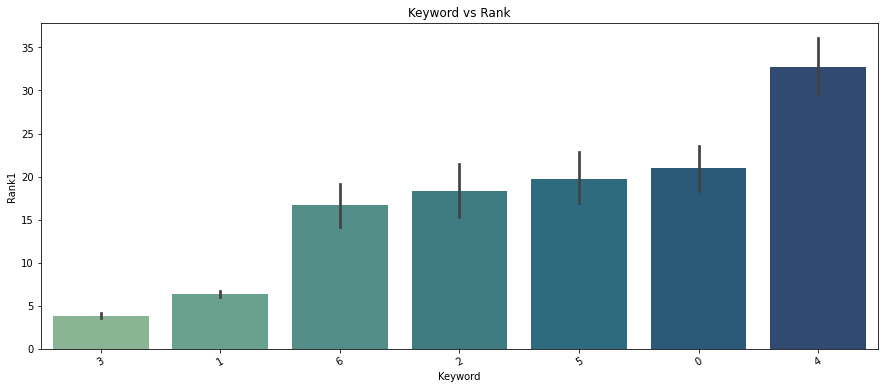

In [49]:
 #lets visualize the correaltion between the short_description and the Rank1
plt.figure(figsize=(15,6))

sns.barplot(x='Keyword',y='Rank1',data=df_final,palette='crest',order=df_final[['Keyword','Rank1']].groupby('Keyword').mean().sort_values('Rank1').reset_index().Keyword)
plt.xticks(rotation=30)
plt.title('Keyword vs Rank')
plt.show()

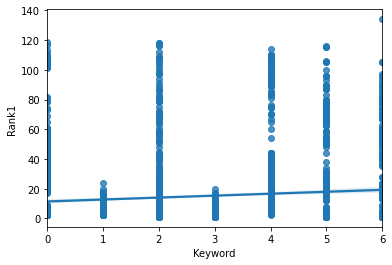

In [50]:
sns.regplot(x=df_final.Keyword,y=df_final.Rank1)
plt.show()

In [57]:
KeyRank_des = pd.crosstab( df_final['Keyword'],df_final['Rank1'])
stats = chi2_contingency(KeyRank_des)
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 3370.634094928135 , dof is 774


Since the value of P is 0 there ia a realtion between the keyword and the ranking we need to check with the correlation

# Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?

Rank & Keyword are weak monotonically negatively correlated, using a keyword in the first 10 words would not have a significantly major monotonically correlation with Rank, however it will impact somewhat negatively correlated

In [58]:
dfx.Keyword.unique()

array([3, 1, 5, 6, 2, 4, 0])

#	Does APP ID (Also known as package name) play any role in ranking?  

Rank is most positively correlated with AppID among the features, these are significantly positive corrrelation with each other and change in one will significantly change other i.e. increment in App ID will increase R

# Any other pattern or good questions that you can think of and answer?

In [117]:
#what are the most frequent words in long description?
counts = dfx.set_index('Rank1')['Long_des'].str.split().explode().groupby(level=0).apply(pd.value_counts)
counts


The most frequent words in long description are web, browser, serach, private, engine, etc

# what are the most frequent words in short description?

In [116]:
counts = dfx.set_index('Rank1')['Short_des'].str.split().explode().groupby(level=0).apply(pd.value_counts)
counts


The most frequent words in short description are web,search,ad,trackers etc